In [1]:
#importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from random import randint #to get random values
from time import sleep #to sleep the algorithm while scraping websites
import requests #requests module to requests information from websites
from bs4 import BeautifulSoup
import pandas as pd #for dataframe 
import numpy as np #for numerical analysis


In [ ]:

name = []
apartment_price = []
completion_stage = []
agent_contact = []
day_posted = []
rent_location = []


URL = 'https://www.propertypro.ng/property-for-rent/in/abuja?page='
for page in range(1,550):
    req = requests.get(URL + str(page))
    #html_ = requests.get('https://www.propertypro.ng/property-for-rent/in/abuja').text
    #create an instance of beautifulsoup
    soup = BeautifulSoup(req.text, 'lxml')
    apartments = soup.find_all('div', class_ ='single-room-sale listings-property')
    #get and find infomation about unique properties
    #locat = soup.find_all('div', class_ = 'single-room-img result-img')

    for apartment in apartments:
        try:
            title  = apartment.find('h4', class_= 'listings-property-title').text
        except:
            title = None
        try:
            price = apartment.find('h3', class_ = 'listings-price').text
        except:
            price = None
        try:
            furnishing = apartment.find('div', class_ = 'furnished-btn').text.replace('\n','')
        except:
            furnishing = None
        try:
            agent_no = apartment.find('div', class_ = 'phone-icon').text.replace('\n','')
        except:
            agent_no = None
        try:
            date_posted = apartment.find('div', class_ = 'single-room-text').h5.text
        except:
            date_posted = None
        try:
            location = apartment.find('div', class_ = 'single-room-img result-img').img['title']
        except:
            location = None
        name.append(title)
        apartment_price.append(price)
        completion_stage.append(furnishing)
        agent_contact.append(agent_no)
        day_posted.append(date_posted)
        rent_location.append(location)
    sleep(randint(4,10))

In [ ]:
df = pd.DataFrame()
df['name'] = name
df['apartment_price'] = apartment_price
df['completion_stage'] = completion_stage
df['agent_contact'] = agent_contact
df['day_posted'] = day_posted
df['rent_location'] =  rent_location
df

In [ ]:
df.to_csv('Real_estate.csv')

In [2]:
#the dataset was scrapped from propertyng website and was saved into a csv file
#loading the dataset from a csv file
real_estate_df = pd.read_csv('Real_estate.csv', index_col= [0])

In [3]:
#checking the dataset
real_estate_df

,name,apartment_price,completion_stage,agent_contact,day_posted,rent_location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 3,800,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",ServicedNewly Built,8.036492e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 2,200,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 20,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 40,000,000/year",FurnishedServicedNewly Built,8.160442e+09,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...
...,...,...,...,...,...,...
10935,HOUSE FOR RENT,"₦ 3,100,000",NaN,NaN,Added 12 Apr 2017,House for rent Area 11 Abuja
10936,HOUSE FOR RENT,"₦ 7,000,000",NaN,NaN,Added 12 Apr 2017,"House for rent Asokoro , Abuja Asokoro Abuja"
10937,HOUSE FOR RENT,"₦ 3,000,000",NaN,NaN,Added 12 Apr 2017,"House for rent Asokoro , Abuja Asokoro Abuja"
10938,HOUSE FOR RENT,"₦ 3,500,000",NaN,NaN,Added 12 Apr 2017,"House for rent House 12, Off 69 Road Gwarinpa ..."


In [4]:
real_estate_df.shape

(10940, 6)

In [20]:
#get places with the most expensive apartments, categorised by no of beds
#Areas with more property listings
#Imagine yourself as a property person
#what are the insights you are looking for
#where is the best place to get a self contained in abuja (price - )
#What about a three bd, four bd etc


In [5]:
#setting the index
real_estate_df.columns

Index(['name', 'apartment_price', 'completion_stage', 'agent_contact',
       'day_posted', 'rent_location'],
      dtype='object')

In [6]:
#rename columns
real_estate_df.rename(columns = {'name': 'type', 'apartment_price':'price', 'rent_location': 'apartment_location'}, inplace=True)


In [7]:
real_estate_df.head(10)

,type,price,completion_stage,agent_contact,day_posted,apartment_location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 3,800,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",ServicedNewly Built,8.036492e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 2,200,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 20,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 40,000,000/year",FurnishedServicedNewly Built,8.160442e+09,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...
5,COMMERCIAL PROPERTY FOR RENT,"₦ 15,000,000/year",NaN,8.166684e+09,"Updated 25 Jul 2022, Added 24 Dec 2021",Commercial Property for rent Wuse 2 Abuja
6,4 BEDROOM HOUSE FOR RENT,"₦ 3,500,000/year",Newly Built,8.160442e+09,"Updated 25 Jul 2022, Added 10 Jun 2022",4 bedroom House for rent Northstar Garden Esta...
7,5 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 07 Jun 2022",5 bedroom House for rent Wuye Abuja
8,5 BEDROOM HOUSE FOR RENT,"₦ 20,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 24 May 2022",5 bedroom House for rent Asokoro Abuja
9,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 4,000,000/year",FurnishedServiced,8.160442e+09,"Updated 25 Jul 2022, Added 16 Jun 2022",2 bedroom Flat / Apartment for rent Wuye Abuja


In [8]:
real_estate_df.drop(['agent_contact'], axis = 1, inplace=True)

In [9]:
real_estate_df

,type,price,completion_stage,day_posted,apartment_location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 3,800,000/year",NaN,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 2,200,000/year",NaN,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 20,000,000/year",NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 40,000,000/year",FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...
...,...,...,...,...,...
10935,HOUSE FOR RENT,"₦ 3,100,000",NaN,Added 12 Apr 2017,House for rent Area 11 Abuja
10936,HOUSE FOR RENT,"₦ 7,000,000",NaN,Added 12 Apr 2017,"House for rent Asokoro , Abuja Asokoro Abuja"
10937,HOUSE FOR RENT,"₦ 3,000,000",NaN,Added 12 Apr 2017,"House for rent Asokoro , Abuja Asokoro Abuja"
10938,HOUSE FOR RENT,"₦ 3,500,000",NaN,Added 12 Apr 2017,"House for rent House 12, Off 69 Road Gwarinpa ..."


In [10]:
#we want to perform get numerical insights from the price table
#write function that will look through the price column, and replace values accordingly

characters_to_remove = [' ', ',', '/year', '', '₦']
regular_expression = '[' + re.escape (''. join (characters_to_remove)) + ']'


#data["column_name"] = data["column_name"].apply(lambda x: x.replace("characters_need_to_replace", "new_characters"))
real_estate_df['price'] = real_estate_df['price'].str.replace(regular_expression, '', regex=True)

In [11]:
real_estate_df["price"]

0         3800000
1         7000000
2         2200000
3        20000000
4        40000000
           ...   
10935     3100000
10936     7000000
10937     3000000
10938     3500000
10939     2000000
Name: price, Length: 10940, dtype: object

In [12]:
#there are some disparities in the data, some of the apartment_prices are listed in dollars.
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'(^\$.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\3048529599.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'(^\$.*)')].index, inplace = True)


In [13]:
real_estate_df['price']

0         3800000
1         7000000
2         2200000
3        20000000
4        40000000
           ...   
10935     3100000
10936     7000000
10937     3000000
10938     3500000
10939     2000000
Name: price, Length: 10899, dtype: object

In [14]:
#drop some dataset having rent paid per day
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'([day]$.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\103638274.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'([day]$.*)')].index, inplace = True)


In [68]:
real_estate_df['price'].unique()

array(['3800000', '7000000', '2200000', '20000000', '40000000',
       '15000000', '3500000', '4000000', '3000000', '2000000', '5000000',
       '2500000', '7500000', '6000000', '16000000', '1800000', '10000000',
       '24000000', '25000000000', '13000000', '1200000', '500000',
       '350000', '16500000', '4500000', '12000000', '50000', '22000000',
       '8000000', '2250000', '23000000', '8500000', '1300000', '21000sqm',
       '1500000', '1000000', '2570000', '800000', '6500000', '650000',
       '600000', '1600000', '50000000', '65000000', '1750000', '18000000',
       '14000000', '900000', '1400000', '30000000', '850000', '1700000',
       '550000', '35000sqm', '3400000', '5500000', '7200000', '10500000',
       '2600000', '1900000', '12800000', '25000000', '2700000', '750000',
       '250000', '35000000', '30000sqm', '12500000', '80000000',
       '150000000', '32000000', '2900000', '9000000', '300000', '400000',
       '4400000', '12400000', '120000000', '320000', '700000', '61

In [15]:
characters_to_drop = ['sqm','month']
regular_exp = '[' + re.escape (''. join (characters_to_drop)) + ']'

real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(regular_exp)].index, inplace = True)

In [71]:
real_estate_df['price'].unique()

array(['3800000', '7000000', '2200000', '20000000', '40000000',
       '15000000', '3500000', '4000000', '3000000', '2000000', '5000000',
       '2500000', '7500000', '6000000', '16000000', '1800000', '10000000',
       '24000000', '25000000000', '13000000', '1200000', '500000',
       '350000', '16500000', '4500000', '12000000', '50000', '22000000',
       '8000000', '2250000', '23000000', '8500000', '1300000', '1500000',
       '1000000', '2570000', '800000', '6500000', '650000', '600000',
       '1600000', '50000000', '65000000', '1750000', '18000000',
       '14000000', '900000', '1400000', '30000000', '850000', '1700000',
       '550000', '3400000', '5500000', '7200000', '10500000', '2600000',
       '1900000', '12800000', '25000000', '2700000', '750000', '250000',
       '35000000', '12500000', '80000000', '150000000', '32000000',
       '2900000', '9000000', '300000', '400000', '4400000', '12400000',
       '120000000', '320000', '700000', '6100000', '2750000', '36000000',
     

In [16]:
#now convert apartment_price from string to int
real_estate_df['price'] = real_estate_df['price'].astype(float)

In [17]:
#drop unrealistic price like this, which might cause the data and analtyics skewed
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'] < 10].index, inplace = True)

In [18]:
location = real_estate_df['apartment_location'].str.split(pat = 'for rent', expand = True)
real_estate_df[['info', 'Location']] = location

In [80]:
real_estate_df.head(19)

,type,price,completion_stage,day_posted,apartment_location,info,Location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,3800000.0,NaN,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja,3 bedroom Flat / Apartment,Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,7000000.0,ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...,4 bedroom House,Katampe Extention Diplomatic Zone Katampe Ext...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,2200000.0,NaN,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...,2 bedroom Flat / Apartment,Gaduwa Estate Gaduwa Abuja
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,20000000.0,NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...,6 bedroom Commercial Property,By Ecowas Asokoro Abuja
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,40000000.0,FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...,10 bedroom Commercial Property,Katampe Ext Abuja
5,COMMERCIAL PROPERTY FOR RENT,15000000.0,NaN,"Updated 25 Jul 2022, Added 24 Dec 2021",Commercial Property for rent Wuse 2 Abuja,Commercial Property,Wuse 2 Abuja
6,4 BEDROOM HOUSE FOR RENT,3500000.0,Newly Built,"Updated 25 Jul 2022, Added 10 Jun 2022",4 bedroom House for rent Northstar Garden Esta...,4 bedroom House,Northstar Garden Estate Lokogoma Abuja
7,5 BEDROOM HOUSE FOR RENT,7000000.0,NaN,"Updated 25 Jul 2022, Added 07 Jun 2022",5 bedroom House for rent Wuye Abuja,5 bedroom House,Wuye Abuja
8,5 BEDROOM HOUSE FOR RENT,20000000.0,NaN,"Updated 25 Jul 2022, Added 24 May 2022",5 bedroom House for rent Asokoro Abuja,5 bedroom House,Asokoro Abuja
9,2 BEDROOM FLAT / APARTMENT FOR RENT,4000000.0,FurnishedServiced,"Updated 25 Jul 2022, Added 16 Jun 2022",2 bedroom Flat / Apartment for rent Wuye Abuja,2 bedroom Flat / Apartment,Wuye Abuja


In [19]:
real_estate_df.drop(['apartment_location', 'info'], axis=1, inplace = True)

In [20]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10848 entries, 0 to 10939
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              10848 non-null  object 
 1   price             10848 non-null  float64
 2   completion_stage  4342 non-null   object 
 3   day_posted        10848 non-null  object 
 4   Location          10848 non-null  object 
dtypes: float64(1), object(4)
memory usage: 508.5+ KB


In [21]:
#to easily group the dataset 
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SELF.*)'), 'type'] = 'Self_contain'


#df['name'].str.contains(r'(^SELF.*)')
#df.loc[self_filt, 'name'] ="Self_contain"

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\3656316192.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SELF.*)'), 'type'] = 'Self_contain'


In [34]:
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^1\s+)'), 'type'] = 'One_Bed'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^2\s+)'), 'type'] = 'Two_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^3\s+)'), 'type'] = 'Three_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^4\s+)'), 'type'] = 'Four_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^5\s+)'), 'type'] = 'Five_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^6\s+)'), 'type'] = 'Six_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^7\s+)'), 'type'] = 'Seven_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^8\s+)'), 'type'] = 'Eight_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^9\s+)'), 'type'] = 'Nine_Beds'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^10\s+)'), 'type'] = 'Ten_Beds'

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\289021338.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^1\s+)'), 'type'] = 'One_Bed'
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\289021338.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^2\s+)'), 'type'] = 'Two_Beds'
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\289021338.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^3\s+)'), 'type'] = 'Three_Beds'
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\289021338.py:4: UserWarning: This pattern is interpreted as a regular expression, and h

In [92]:
#checking the data


In [22]:
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^FLAT\s+)'), 'type'] = 'FLAT'

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\2284828908.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^FLAT\s+)'), 'type'] = 'FLAT'


In [23]:
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^TERRACED\s+)'), 'type'] = 'Terraced_apartment'



C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\3811749174.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^TERRACED\s+)'), 'type'] = 'Terraced_apartment'


In [24]:
real_estate_df['type'].unique()

array(['3 BEDROOM FLAT / APARTMENT FOR RENT', '4 BEDROOM HOUSE FOR RENT',
       '2 BEDROOM FLAT / APARTMENT FOR RENT',
       '6 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '10 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       'COMMERCIAL PROPERTY FOR RENT', '5 BEDROOM HOUSE FOR RENT', 'FLAT',
       'HOUSE FOR RENT', '3 BEDROOM HOUSE FOR RENT',
       '1 BEDROOM FLAT / APARTMENT FOR RENT', '2 BEDROOM HOUSE FOR RENT',
       '10 BEDROOM HOUSE FOR RENT', '4 BEDROOM FLAT / APARTMENT FOR RENT',
       '7 BEDROOM HOUSE FOR RENT', 'LAND FOR RENT',
       '1 BEDROOM HOUSE FOR RENT', '5 BEDROOM FLAT / APARTMENT FOR RENT',
       '6 BEDROOM HOUSE FOR RENT', 'CO WORKING SPACE FOR RENT',
       '5 BEDROOM DETACHED DUPLEX HOUSE FOR RENT',
       '1 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '8 BEDROOM HOUSE FOR RENT',
       '4 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '9 BEDROOM HOUSE FOR RENT', 'Terraced_apartment',
       'COMMERCIAL LAND FOR RENT', 'DETACHED DUPLEX FOR RENT',
       'MI

In [31]:
#dropping some unorganized data
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[B].*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[WRCMH].*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^MIXED.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[C].*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\1020972194.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[B].*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\1020972194.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[WRCMH].*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\1020972194.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^MIXED.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\1020972194

In [38]:
#for effective grouping of some of these
#real_estate_df['type'].unique()

real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SH.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\3370260153.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SH.*)')].index, inplace = True)


In [43]:
real_estate_df['type'].unique()

array(['Three_Beds', 'Four_Beds', 'Two_Beds', 'Six_Beds', 'Ten_Beds',
       'Five_Beds', 'FLAT', 'One_Bed', 'Seven_Beds', 'Eight_Beds',
       'Nine_Beds', 'Terraced_apartment', 'Self_contain', ' FOR RENT'],
      dtype=object)

In [42]:
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SERVICED.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SEMI.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^DETACHED.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^OFFICE.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^LAND.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^EVENT.*)')].index, inplace = True)
#real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^EVENT.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\1328628708.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SERVICED.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\1328628708.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SEMI.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\1328628708.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^DETACHED.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\13286

In [44]:
real_estate_df.drop(real_estate_df.loc[real_estate_df["type"] == ' FOR RENT'].index, inplace = True)

In [45]:
real_estate_df['type'].unique()

array(['Three_Beds', 'Four_Beds', 'Two_Beds', 'Six_Beds', 'Ten_Beds',
       'Five_Beds', 'FLAT', 'One_Bed', 'Seven_Beds', 'Eight_Beds',
       'Nine_Beds', 'Terraced_apartment', 'Self_contain'], dtype=object)

In [53]:
real_estate_df.describe()

,price
count,1.011200e+04
mean,3.033754e+06
std,6.350745e+07
min,-2.147484e+09
25%,1.000000e+06
50%,2.000000e+06
75%,3.500000e+06
max,2.000000e+09


In [52]:
real_estate_df['price']= real_estate_df['price'].astype(int)

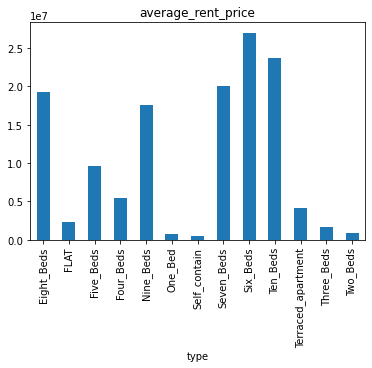

In [63]:
avg_price_type = real_estate_df.groupby('type')['price'].mean()
avg_price_type.plot(kind = 'bar', title = 'average_rent_price')
plt.show()

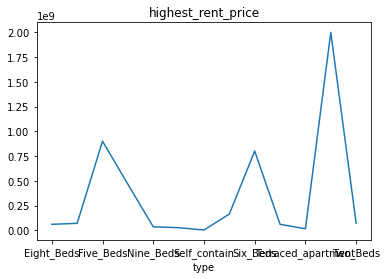

In [70]:
max_price_type.plot(kind = 'line', title = 'highest_rent_price')
plt.show()

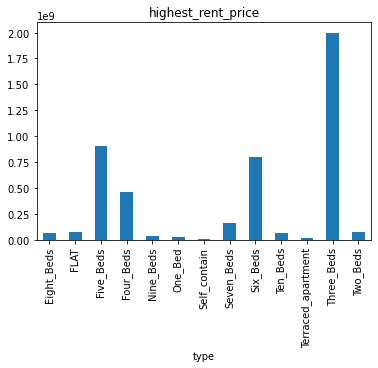

In [69]:
#three bedrooms have the most expensive listing
max_price_type = real_estate_df.groupby('type')['price'].max()
max_price_type.plot(kind = 'bar', title = 'highest_rent_price')
plt.show()

<AxesSubplot:xlabel='count', ylabel='type'>

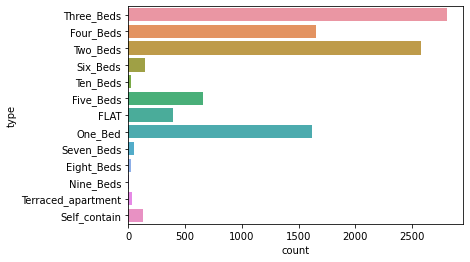

In [76]:
#create a count plot
sns.countplot(y= "type", data = real_estate_df)

In [77]:
real_estate_df.head(5)

,type,price,completion_stage,day_posted,Location
0,Three_Beds,3800000,NaN,"Updated 25 Jul 2022, Added 27 Jun 2022",Durumi Abuja
1,Four_Beds,7000000,ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",Katampe Extention Diplomatic Zone Katampe Ext...
2,Two_Beds,2200000,NaN,"Updated 25 Jul 2022, Added 11 Jun 2022",Gaduwa Estate Gaduwa Abuja
3,Six_Beds,20000000,NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",By Ecowas Asokoro Abuja
4,Ten_Beds,40000000,FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",Katampe Ext Abuja


In [94]:
real_estate_df.loc[real_estate_df['Location'].str.contains('Lugbe'), 'Location'] = 'Lugbe'
real_estate_df.loc[real_estate_df['Location'].str.contains('Asokoro'), 'Location'] = 'Asokoro'
real_estate_df.loc[real_estate_df['Location'].str.contains('Maitama'), 'Location'] = 'Maitama'
real_estate_df.loc[real_estate_df['Location'].str.contains('Apo'), 'Location'] = 'Apo'
real_estate_df.loc[real_estate_df['Location'].str.contains('Galadimawa'), 'Location'] = 'Galadimawa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Lokogoma'), 'Location'] = 'Lokogoma'
real_estate_df.loc[real_estate_df['Location'].str.contains('Wuse'), 'Location'] = 'Wuse'
real_estate_df.loc[real_estate_df['Location'].str.contains('Guzape'), 'Location'] = 'Guzape'
real_estate_df.loc[real_estate_df['Location'].str.contains('Garki'), 'Location'] = 'Garki'
real_estate_df.loc[real_estate_df['Location'].str.contains('Lifecamp'), 'Location'] = 'Lifecamp'
real_estate_df.loc[real_estate_df['Location'].str.contains('Gwarimpa'), 'Location'] = 'Gwarimpa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Kubwa'), 'Location'] = 'Kubwa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Wuye'), 'Location'] = 'Wuye'
real_estate_df.loc[real_estate_df['Location'].str.contains('Jahi'), 'Location'] = 'Jahi'
real_estate_df.loc[real_estate_df['Location'].str.contains('Jabi'), 'Location'] = 'Jabi'
real_estate_df.loc[real_estate_df['Location'].str.contains('Utako'), 'Location'] = 'Utako'
real_estate_df.loc[real_estate_df['Location'].str.contains('Mabushi'), 'Location'] = 'Mabushi'
real_estate_df.loc[real_estate_df['Location'].str.contains('Mararaba'), 'Location'] = 'Mararaba'
real_estate_df.loc[real_estate_df['Location'].str.contains('Kuje'), 'Location'] = 'Kuje'
real_estate_df.loc[real_estate_df['Location'].str.contains('Katampe'), 'Location'] = 'Katampe'
real_estate_df.loc[real_estate_df['Location'].str.contains('Gwarinpa'), 'Location'] = 'Gwarimpa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Karu'), 'Location'] = 'Karu'
real_estate_df.loc[real_estate_df['Location'].str.contains('Kado'), 'Location'] = 'Kado'

In [108]:
listings = ['Lugbe', 'Asokoro', 'Maitama' ,'Apo' ,'Galadimawa' , 'Lokogoma' ,'Wuse', 'Guzape', 'Garki' ,'Lifecamp','Gwarimpa','Kubwa','Wuye','Jahi', 'Jabi', 'Utako', 'Mabushi', 'Mararaba', 'Kuje','Katampe' ,'Gwarimpa', 'Karu', 'Kado']
#reg_p = '[' + re.escape (''. join (listings)) + ']'

abuja_df = real_estate_df.loc[real_estate_df['Location'].isin(listings)]

In [109]:
abuja_df

,type,price,completion_stage,day_posted,Location
1,Four_Beds,7000000,ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",Katampe
3,Six_Beds,20000000,NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",Asokoro
4,Ten_Beds,40000000,FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",Katampe
6,Four_Beds,3500000,Newly Built,"Updated 25 Jul 2022, Added 10 Jun 2022",Lokogoma
7,Five_Beds,7000000,NaN,"Updated 25 Jul 2022, Added 07 Jun 2022",Wuye
...,...,...,...,...,...
10931,Four_Beds,10000000,NaN,Added 12 Apr 2017,Jahi
10932,Two_Beds,2000000,NaN,Added 12 Apr 2017,Maitama
10933,Three_Beds,800000,NaN,Added 12 Apr 2017,Karu
10934,Four_Beds,2700000,NaN,Added 12 Apr 2017,Gwarimpa


<AxesSubplot:xlabel='Location'>

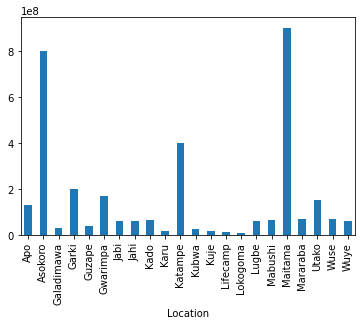

In [122]:
location_grp = abuja_df.groupby('Location')['price'].max()
location_grp.plot(kind = 'bar')


<AxesSubplot:xlabel='count', ylabel='Location'>

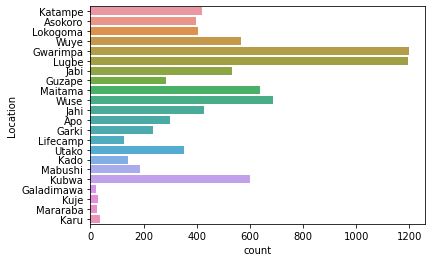

In [128]:
#the data is showing that lugbe and gwarinpa have the most listings, while places like kuje and maraba have the least
sns.countplot(y= 'Location',data = abuja_df)

<AxesSubplot:xlabel='count', ylabel='Location'>

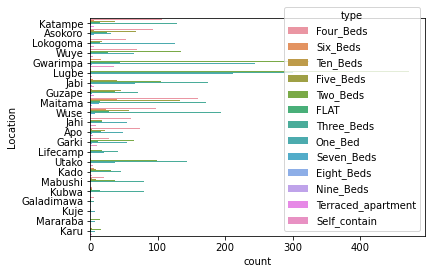

In [129]:
#sub dividing the listings by type of listings 

sns.countplot(y= 'Location', hue = 'type', data = abuja_df)

<AxesSubplot:xlabel='type'>

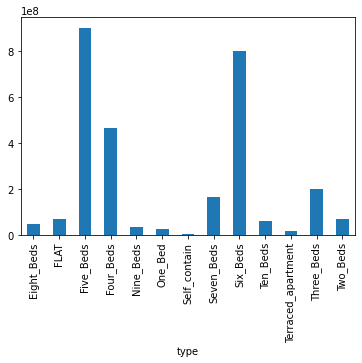

In [133]:
type_grp = abuja_df.groupby('type')['price'].max()
type_grp.plot(kind = 'bar')

In [149]:
#some negative values to be dropped
abuja_df.drop(abuja_df.loc[abuja_df['price'] < 0].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\439427844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abuja_df.drop(abuja_df.loc[abuja_df['price'] < 0].index, inplace = True)


<AxesSubplot:xlabel='price', ylabel='Location'>

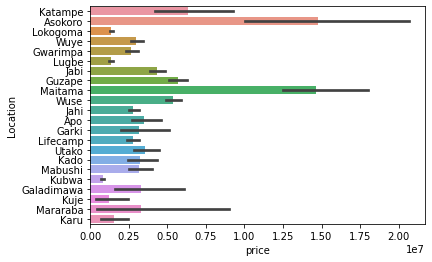

In [155]:
sns.barplot(x = abuja_df['price'], y = abuja_df['Location'])